In [1]:
#imports all the necessary libraries
!pip install pandas
!pip install yfinance
!pip install scikit-learn

In [2]:
import yfinance as yf

In [3]:
#gets all the data for tsla
tsla = yf.Ticker("TSLA")

In [4]:
#gets all the history data for tsla
tsla = tsla.history(period = "max")

In [5]:
#displays the data
tsla

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0
...,...,...,...,...,...,...,...
2023-12-29 00:00:00-05:00,255.100006,255.190002,247.429993,248.479996,100615300,0.0,0.0
2024-01-02 00:00:00-05:00,250.080002,251.250000,244.410004,248.419998,104654200,0.0,0.0
2024-01-03 00:00:00-05:00,244.979996,245.679993,236.320007,238.449997,121082600,0.0,0.0


<Axes: xlabel='Date'>

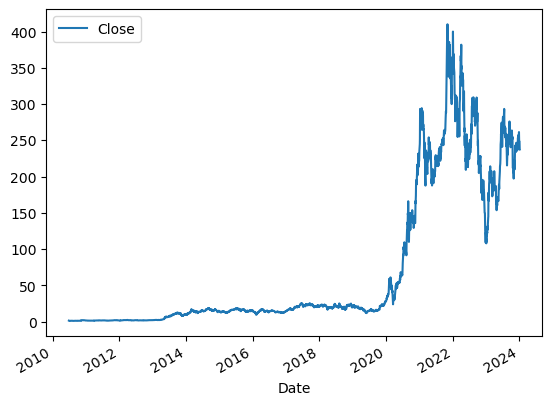

In [6]:
#plots the data using the closing prices
tsla.plot.line(y="Close", use_index = True)

In [7]:
#deletes all the unnecessary data
del tsla["Dividends"]
del tsla["Stock Splits"]

In [8]:
#creates a tomorrow column to predict future data
tsla["Tomorrow"] = tsla["Close"].shift(-1)

In [9]:
tsla

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,1.588667
2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,1.464000
2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,1.280000
2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,1.074000
2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,1.053333
...,...,...,...,...,...,...
2023-12-29 00:00:00-05:00,255.100006,255.190002,247.429993,248.479996,100615300,248.419998
2024-01-02 00:00:00-05:00,250.080002,251.250000,244.410004,248.419998,104654200,238.449997
2024-01-03 00:00:00-05:00,244.979996,245.679993,236.320007,238.449997,121082600,237.929993


In [10]:
#creates the target column which represents if the market will be up or down
tsla["Target"] = (tsla["Tomorrow"] > tsla["Close"]).astype(int)

In [11]:
tsla


,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,1.588667,0
2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,1.464000,0
2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,1.280000,0
2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,1.074000,0
2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,1.053333,0
...,...,...,...,...,...,...,...
2023-12-29 00:00:00-05:00,255.100006,255.190002,247.429993,248.479996,100615300,248.419998,0
2024-01-02 00:00:00-05:00,250.080002,251.250000,244.410004,248.419998,104654200,238.449997,0
2024-01-03 00:00:00-05:00,244.979996,245.679993,236.320007,238.449997,121082600,237.929993,0


In [12]:
#initial basic model
from sklearn.ensemble import RandomForestClassifier
#use randomforestclassifier to calculate because there is no linearity and randomforestclassifer is good to calculate
#random relationships

#n_estimator: number of decision trees
#min_samples_split: protects from overfit
#random_state: keeps the numbers the same so each time it is ran
model = RandomForestClassifier(n_estimators = 100, min_samples_split = 100, random_state = 1)
#splits data up into a train set and a test set
train = tsla.iloc[:-100]
test = tsla.iloc[-100:]
#list of our predictors
predictors = ["Close", "Volume", "Open", "High", "Low"]
#fits the model using the predictors to predict the target
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [13]:
from sklearn.metrics import precision_score
#measures how accurate the model is 
preds = model.predict(test[predictors])

In [14]:
import pandas as pd
#makes the predictions more readable
preds = pd.Series(preds, index = test.index)

In [15]:
preds

Date
2023-08-15 00:00:00-04:00    0
2023-08-16 00:00:00-04:00    0
2023-08-17 00:00:00-04:00    1
2023-08-18 00:00:00-04:00    1
2023-08-21 00:00:00-04:00    1
                            ..
2023-12-29 00:00:00-05:00    0
2024-01-02 00:00:00-05:00    0
2024-01-03 00:00:00-05:00    0
2024-01-04 00:00:00-05:00    0
2024-01-05 00:00:00-05:00    0
Length: 100, dtype: int32

In [16]:
precision_score(test["Target"], preds)

0.5161290322580645

In [17]:
combined = pd.concat([test["Target"], preds], axis = 1)

<Axes: xlabel='Date'>

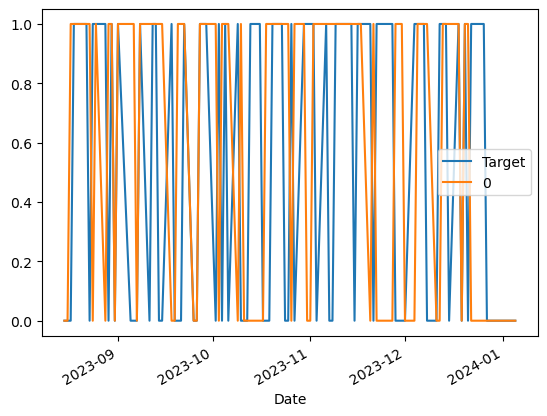

In [18]:
#plots the predictions, the orange line is the predictions and blue is the actual data
combined.plot()

In [19]:
#this basically is repeating what I did above but in a function
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index = test.index, name = "Predictions")
    combined = pd.concat([test["Target"], preds], axis = 1)
    return combined

In [20]:
#backtesting
#start is the value which is the amount of data to train the model, every year there is around 250 trading days so here I
#use the first 5 years of data to predict the data
#step is the value in which I step through the predictions which is one year
def backtest(data, model, predictors, start = 750, step = 250):
    #stores all the predictions
    all_predictions = []
    #loops through the data starting from the start 
    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    return pd.concat(all_predictions)

In [21]:
predictions = backtest(tsla, model, predictors)

In [22]:
predictions["Predictions"].value_counts()

Predictions
0    1420
1    1234
Name: count, dtype: int64

In [23]:
#I am accurate 55% of the time
precision_score(predictions["Target"], predictions["Predictions"])

0.5194489465153971

In [24]:
predictions["Target"].value_counts()/predictions.shape[0]

Target
1    0.519593
0    0.480407
Name: count, dtype: float64

In [25]:
#adding new predictors to increase accuracy
# 2days, 5 days, 60 days, a year, 4 years
horizons = [2,5,60, 250, 1000]
new_predictors = []
#loops thru each horizon
for horizon in horizons:
    #finds the rolinga verages
    rolling_averages = tsla.rolling(horizon).mean()
    ratio_column = f"Close_Ratio_{horizon}"
    tsla[ratio_column] = tsla["Close"] /rolling_averages["Close"]
    trend_column = f"Trend_{horizon}"
    tsla[trend_column] = tsla.shift(1).rolling(horizon).sum()["Target"]
    new_predictors += [ratio_column, trend_column]

In [26]:
#drops all the days where there is no applicable data
tsla = tsla.dropna()

In [27]:
tsla

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
2014-06-19 00:00:00-04:00,15.258667,15.687333,15.133333,15.186000,131896500,15.306000,1,1.001473,1.0,1.019094,4.0,1.104864,30.0,1.305755,134.0,3.367118,516.0
2014-06-20 00:00:00-04:00,15.234667,15.419333,15.080000,15.306000,73558500,15.814667,1,1.003935,2.0,1.006285,4.0,1.112100,31.0,1.312219,134.0,3.383434,517.0
2014-06-23 00:00:00-04:00,15.300667,15.932667,15.214667,15.814667,116866500,15.500000,0,1.016345,2.0,1.028360,4.0,1.146291,32.0,1.351662,134.0,3.484822,518.0
2014-06-24 00:00:00-04:00,15.931333,16.125334,15.442000,15.500000,121138500,15.792667,1,0.989951,1.0,1.007174,3.0,1.121665,31.0,1.320951,133.0,3.404815,518.0
2014-06-25 00:00:00-04:00,15.536667,15.836667,15.349333,15.792667,87024000,15.706667,0,1.009353,1.0,1.017578,4.0,1.140236,32.0,1.342000,133.0,3.457924,519.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-28 00:00:00-05:00,263.660004,265.130005,252.710007,253.179993,113619900,248.479996,0,0.983949,1.0,0.990323,3.0,1.067837,34.0,1.166868,138.0,1.205732,536.0
2023-12-29 00:00:00-05:00,255.100006,255.190002,247.429993,248.479996,100615300,248.419998,0,0.990631,0.0,0.976538,2.0,1.048949,33.0,1.142567,137.0,1.182131,536.0
2024-01-02 00:00:00-05:00,250.080002,251.250000,244.410004,248.419998,104654200,238.449997,0,0.999879,0.0,0.979474,2.0,1.049554,33.0,1.139350,137.0,1.180629,536.0


In [28]:
model = RandomForestClassifier(n_estimators = 200, min_samples_split = 50, random_state = 1)

In [29]:
#a more controlled predict function
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    #gives a decimal value to how confident the prediction is
    preds = model.predict_proba(test[predictors])[:,1]
    #if it is atleast 65% confident it will make the trade
    preds[preds >= .65] = 1
    preds[preds< .65] = 0
    preds = pd.Series(preds, index = test.index, name = "Predictions")
    combined = pd.concat([test["Target"], preds], axis = 1)
    return combined

In [30]:
predictions = backtest(tsla, model, new_predictors)

In [31]:
predictions["Predictions"].value_counts()

Predictions
0.0    1498
1.0     155
Name: count, dtype: int64

In [32]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5096774193548387